In [2]:
import pandas as pd

# Load the baseline and SHAP output
baseline = pd.read_csv('./DEMO-xgboost-dm-1000-samples/clarify-explainability/explanations_shap/baseline.csv')
out = pd.read_csv('./DEMO-xgboost-dm-1000-samples/clarify-explainability/explanations_shap/out.csv')

# Check the contents
print("Baseline:")
print(baseline.head())

print("\nSHAP Output:")
print(out.head())

Baseline:
     CNTSCHID    CNTSTUID  SISCO  ST347Q01JA  ST347Q02JA  ST349Q01JA_0  \
0  17000028.0  17001050.0    1.0         5.0         1.0           0.0   

   ST349Q01JA_1  ST349Q01JA_2  ST349Q01JA_3  ST349Q01JA_4  ...  LANGN_912  \
0           1.0           0.0           0.0           0.0  ...        0.0   

   LANGN_913  LANGN_914  LANGN_916  LANGN_917  LANGN_918  LANGN_919  \
0        0.0        0.0        0.0        0.0        0.0        0.0   

   LANGN_920  LANGN_921  LANGN_922  
0        0.0        0.0        0.0  

[1 rows x 568 columns]

SHAP Output:
   CNTSCHID_label0  CNTSTUID_label0  SISCO_label0  ST347Q01JA_label0  \
0        -0.001485         0.001116      0.008425           0.000337   
1         0.014752         0.006669      0.000620           0.013431   
2         0.010710         0.010539     -0.000825           0.008553   
3         0.013434         0.028971      0.001813           0.001596   
4        -0.002936         0.008302     -0.006122           0.011102   

In [4]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 18.9 MB/s eta 0:00:00


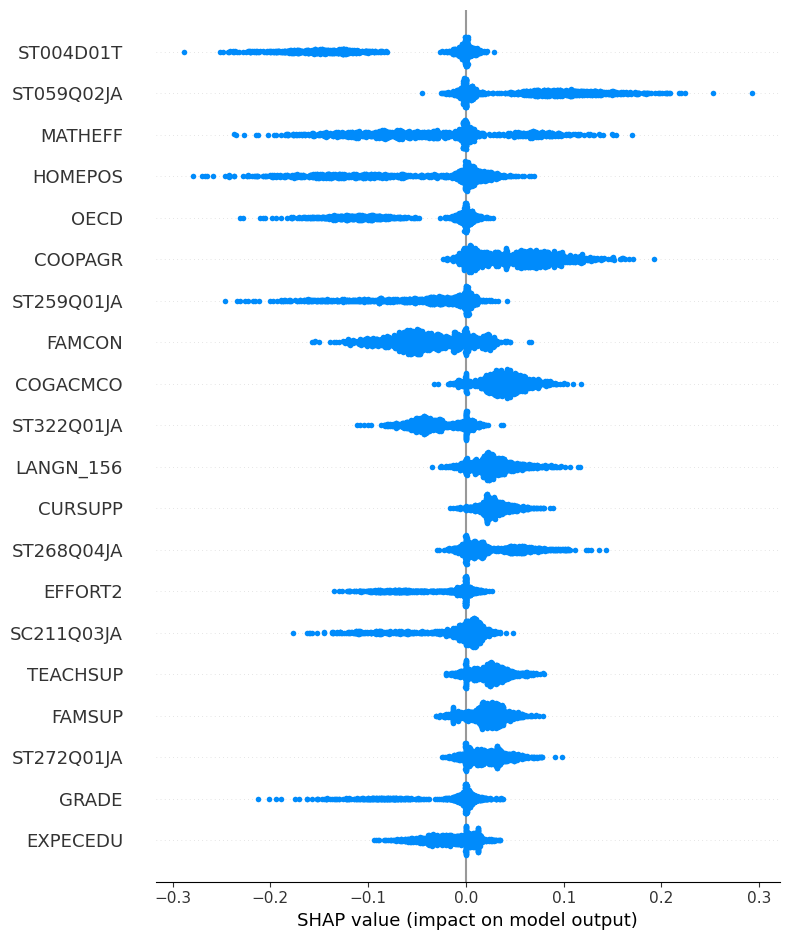

In [8]:
import shap
import matplotlib.pyplot as plt

# Strip '_label0' suffix from out.csv column names
feature_names = [col.replace('_label0', '') for col in out.columns]

# Extract SHAP values (1000 rows, one per sample)
shap_values = out.values  # This is now a 2D matrix with 1000 rows

# Extract baseline values (single row)
baseline_values = baseline.values.flatten()

# Create SHAP Explanation object
explainer = shap.Explanation(values=shap_values, base_values=baseline_values, feature_names=feature_names)

# Plot SHAP summary (beeswarm by default)
shap.summary_plot(explainer)

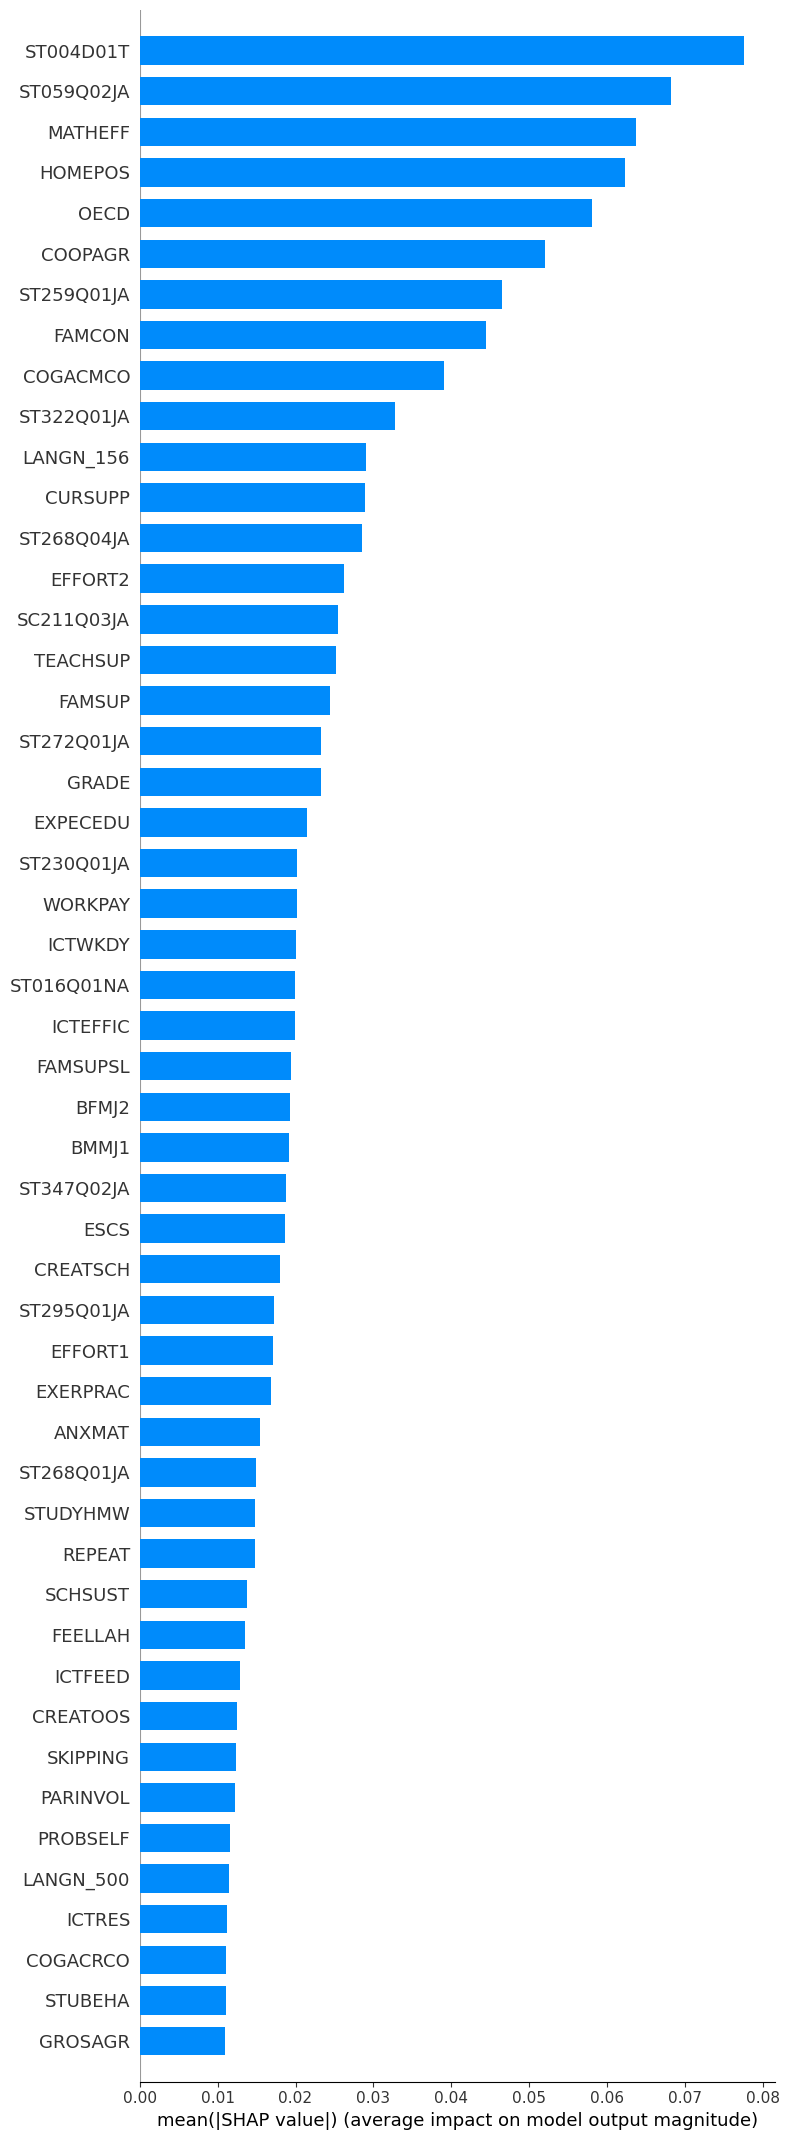

In [10]:
# Bar chart of top 15 features
shap.summary_plot(explainer, plot_type="bar", max_display=50)